# Tarea - Ajuste de curvas

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt


---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [17]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 27$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

[8.92900561 0.18667056]
[9.52314626e+00 6.37449447e-02 4.39020025e-03]
[9.48692932e+00 7.79910482e-02 3.14098967e-03 2.97427182e-05]


Text(0.5, 1.0, 'Costo de electricidad')

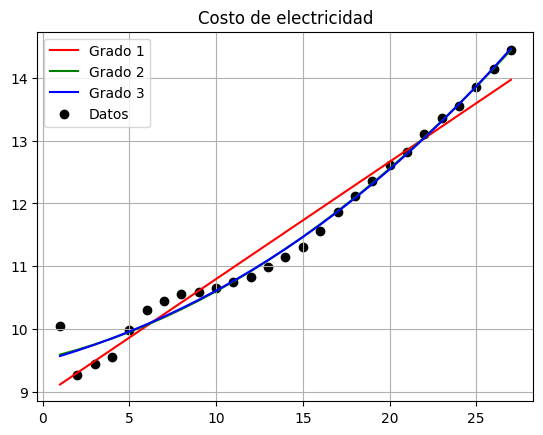

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

x=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27])
y=np.array([10.051101,9.259127,9.444813,9.557723,9.977324,10.298326,10.447217,10.550506,10.590784,10.657418,10.743085,10.831965,10.988435,11.153055,11.313326,11.557165,11.860136,12.122511,12.356448,12.611391,12.814569,13.111372,13.357134,13.559012,13.85861,14.135924,14.436149])

def modelo(beta, x, grado):
    return sum([beta[i]*x**i for i in range(grado+1)])

def costo(beta, x, y, grado):
    return np.mean((y - modelo(beta, x, grado))**2)

grados=[1,2,3]
colores=['r','g','b']
plt.figure()
for i,g in enumerate(grados):
    sol=opt.minimize(costo,np.random.rand(g+1),args=(x,y,g))
    print(sol.x)
    y_pred=modelo(sol.x,x,g)
    plt.plot(x,y_pred,colores[i],label=f'Grado {g}')
plt.scatter(x,y,c='k',label='Datos')
plt.legend()
plt.grid()
plt.title('Costo de electricidad')

**Respuesta:**

Las funciones que mejor se adaptaron a los datos en cada grado son las sigueintes:

- Grado 1: $8.92900599+0.18667054x$

- Grado 2: $9.523146+0.0637449800x+0.00439019921x^2$

- Grado 3: $9.48692554+0.0779893811x+0.00314121008x^2+0.0000297378606x^3$

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [44]:
data = pd.read_csv('population_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'population_data.csv'

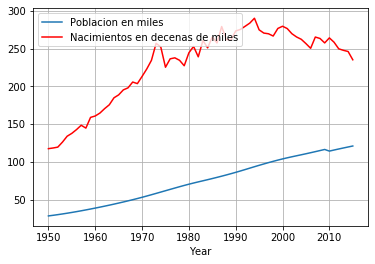

In [ ]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/10000,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

---

[-2.98663942e+06  1.54398819e+03]
[-8.62107534e-01 -1.46913846e+03  7.59892326e-01]
[ 4.43669612e+03 -1.16943150e+03  4.48113005e-01  8.04147188e-05]


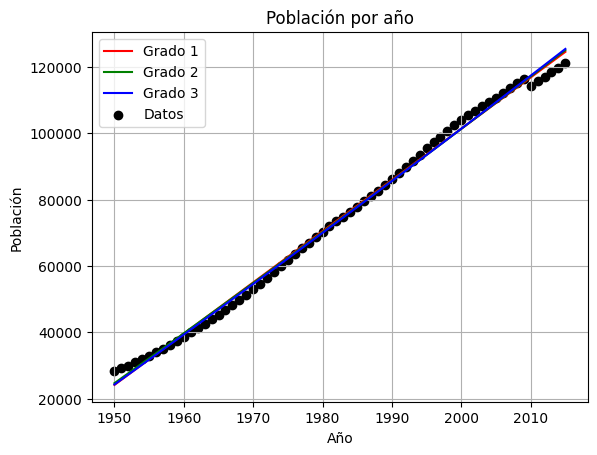

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Datos de años y población
x = np.array([1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015])
y = np.array([28296,29110,29980,30904,31880,32906,33978,35095,36253,37448,38677,39939,41234,42564,43931,45339,46784,48264,49788,51361,52988,54669,56396,58156,59931,61708,63486,65261,67013,68715,70353,71916,73416,74880,76351,77859,79410,80999,82635,84327,86077,87890,89758,91654,93542,95393,97202,98969,100679,102317,103874,105340,106724,108056,109382,110732,112117,113530,114968,116423,114255,115683,117054,118395,119713,121005])

def modelo(beta, x, grado):
    return sum([beta[i]*x**i for i in range(grado+1)])

def costo(beta, x, y, grado):
    return np.mean((y - modelo(beta, x, grado))**2)

grados = [1, 2, 3]
colores = ['r', 'g', 'b']
plt.figure()
for i, g in enumerate(grados):
    sol = opt.minimize(costo, np.random.rand(g+1), args=(x, y, g))
    print(sol.x)
    y_pred = modelo(sol.x, x, g)
    plt.plot(x, y_pred, colores[i], label=f'Grado {g}')
plt.scatter(x, y, c='k', label='Datos')
plt.legend()
plt.grid()
plt.title('Población por año')
plt.xlabel('Año')
plt.ylabel('Población')
plt.show()

**Resultado primera parte:**

Las ecuaciones que mejor se ajustan a los datos son las siguientes:

- Grados 1: $-2986639.42+1543.98819x$

- Grado 2: $-0.862107534-1469.13846x+0.759892326x^2$

- Grado 3: $4436.69612-1169.43150x+0.448113005x^2+0.0000804147188x^3$

[-4.16916730e+07  2.21784811e+04]
[-1.17443108e+03 -1.95654057e+04  1.04477987e+01]
[ 8.97415058e+05 -1.56883189e+06  1.57288221e+03 -3.94007647e-01]


Text(0, 0.5, 'Nacimientos')

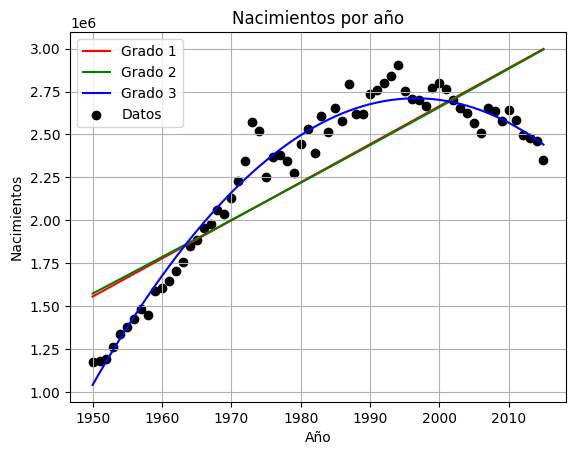

In [58]:
x = np.array([1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015])
y = np.array([1174947,1183788,1195209,1261775,1339837,1377917,1427722,1485202,1447578,1589606,1608174,1647006,1705481,1756624,1849408,1888171,1954340,1981363,2058251,2037561,2132630,2231399,2346002,2572287,2522580,2254497,2366305,2379327,2346862,2274267,2446238,2530662,2392849,2609088,2511894,2655671,2577045,2794390,2622031,2620262,2735312,2756447,2797397,2839686,2904389,2750444,2707718,2698425,2668429,2769089,2798339,2767610,2699084,2655894,2625056,2567906,2505939,2655083,2636110,2577214,2643908,2586287,2498880,2478889,2463420,2353596])

def modelo(beta, x, grado):
    return sum([beta[i]*x**i for i in range(grado+1)])

def costo(beta, x, y, grado):
    return np.mean((y - modelo(beta, x, grado))**2)

grados = [1, 2, 3]
colores = ['r', 'g', 'b']
plt.figure()
for i, g in enumerate(grados):
    sol = opt.minimize(costo, np.random.rand(g+1), args=(x, y, g))
    print(sol.x)
    y_pred = modelo(sol.x, x, g)
    plt.plot(x, y_pred, colores[i], label=f'Grado {g}')
plt.scatter(x, y, c='k', label='Datos')
plt.legend()
plt.grid()
plt.title('Nacimientos por año')
plt.xlabel('Año')
plt.ylabel('Nacimientos')

**Resultado segunda parte:**

Las ecuaciones que mejor se ajustan a los datos son las siguientes:

- Grados 1: $-41691673.0+22178.4811x$

- Grado 2: $-1174.43108-19565.4057x+10.4477987x^2$

- Grado 3: $897415.058-1568831.89x+1572.88221x^2-0.39400764x^3$